<a href="https://colab.research.google.com/github/wjdgoruds2/AI-_assignment/blob/master/A*%20Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

경로: 
[(0, 0), (1, 0), (2, 1), (3, 1), (4, 2), (5, 2), (6, 3), (7, 4), (8, 5), (9, 5)]
[(10, 5), (11, 5), (12, 4), (13, 3), (14, 2), (15, 1), (16, 1), (17, 1), (18, 2), (18, 3)]
[(18, 4), (18, 5), (18, 6), (18, 7), (18, 8), (18, 9), (18, 10), (18, 11), (18, 12), (17, 13)]
[(16, 14), (15, 14), (14, 14), (13, 14), (12, 15), (11, 15), (10, 15), (9, 15), (8, 16), (7, 17)]
[(6, 18), (5, 18), (4, 18), (3, 18), (2, 18), (1, 18), (0, 19)]


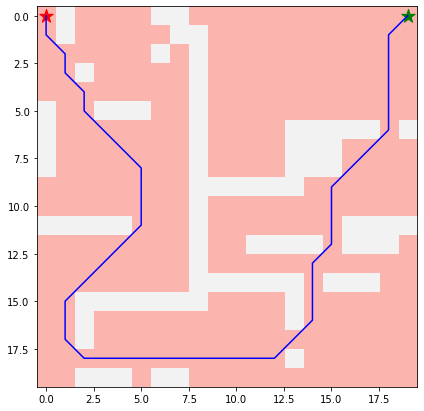

In [19]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

grid=np.array([
               [0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
               [1,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
               [1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,1,0,1],
               [1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0],
               [1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0],
               [0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
               [1,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1],
               [0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,1,1,1,0],
               [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,1,1,1,0,0],
               [0,0,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0],
               [0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
               [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
               [0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0],

])
start=(0,0)
goal=(0,19)

def heuristic(a,b):
    return np.sqrt((b[0]-a[0])**2+(b[1]-a[1])**2)

def Astar(array,start,goal):
  neighbors=[(0,1),(0,-1),(1,0),(-1,0),(1,1),(1,-1),(-1,1),(-1,-1)]
  close_set=set()
  came_from={}
  gscore={start:0}
  fscore={start:heuristic(start,goal)}
  oheap=[]
  heapq.heappush(oheap,(fscore[start],start))

  while oheap:
    current=heapq.heappop(oheap)[1]
    if current==goal:
      data=[]
      while current in came_from:
        data.append(current)
        current=came_from[current]
      return data
    close_set.add(current)

    

    for i,j in neighbors:
      neighbor=current[0]+i,current[1]+j
      if 0<=neighbor[0]<array.shape[0]:
        if 0<=neighbor[1]<array.shape[1]:
          if array[neighbor[0]][neighbor[1]]==1:
            continue
        else:
            continue
      else:
          continue

      temp_g_score=gscore[current]+heuristic(current,neighbor)
      if neighbor in close_set and temp_g_score>=gscore.get(neighbor,0):
        continue
        
      if temp_g_score<gscore.get(neighbor,0) or neighbor not in [i[1] for i in oheap]:
        came_from[neighbor]=current
        gscore[neighbor]=temp_g_score
        fscore[neighbor]=temp_g_score+heuristic(neighbor,goal)
        heapq.heappush(oheap,(fscore[neighbor],neighbor))
  return False

route=Astar(grid,start,goal)
route=route + [start]
route=route[::-1]
print('경로: ')
start_pos=0
end_pos=len(route)
div=10
for idx in range(start_pos,end_pos+div,div):
  out=route[start_pos:start_pos+10]
  if out !=[]:
    print(out)
  start_pos=start_pos+div


x_coords=[]
y_coords=[]
for i in (range(0,len(route))):
  x = route[i][0]
  y = route[i][1]
  x_coords.append(x)
  y_coords.append(y)

fix,ax=plt.subplots(figsize=(7,7))
ax.imshow(grid,cmap=plt.cm.Pastel1)
ax.scatter(start[1],start[0],marker=  "*",  color=  "red",  s=200)
ax.scatter(goal[1],goal[0],marker=  "*",  color=  "green",  s=200)
ax.plot(y_coords,x_coords,color=  "blue")
plt.show()
